In [2]:
from sklearn.neural_network import MLPClassifier


In [3]:
import numpy as np
import pandas as pd
#df = pd.read_csv('data/breast_cancer.csv', delimiter=',', quotechar='"')
df = pd.read_csv('data/breast_cancer.csv', delimiter=',', quotechar='"')

In [4]:
features = df.loc[:,"radius_mean":"fractal_dimension_worst"]
labels = df["diagnosis"]
#1 for malignant 0 for benign
binary_labels = [1 if x == 'M' else 0 for x in labels]

In [4]:
sum(binary_labels)-len(binary_labels)

-357

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, binary_labels, test_size=0.25)

In [54]:
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report,confusion_matrix

#change the number of hidden layers
num_layers = range(0,15)
train_precision = []
test_precision = []

train_recall = []
test_recall = []

for i in num_layers:
    hidden_layer = tuple([15]*i)
    mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=550, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1)
    X_train_temp = scaler.transform(X_train[:end])
    X_test_temp = scaler.transform(X_test)
    mlp.fit(X_train_temp,y_train[:end])
    prediction_test = mlp.predict(X_test_temp)
    prediction_train = mlp.predict(X_train_temp)
    print(confusion_matrix(y_test, mlp.predict(X_test_temp)))
    train_precision.append(precision_score(y_train, mlp.predict(X_train_temp)))
    test_precision.append(precision_score(y_test, prediction_test))
    
    train_recall.append(recall_score(y_train, mlp.predict(X_train_temp)))
    test_recall.append(recall_score(y_test, prediction_test))

[[89  0]
 [ 2 52]]
[[89  0]
 [ 2 52]]
[[89  0]
 [ 2 52]]
[[89  0]
 [ 1 53]]
[[88  1]
 [ 1 53]]
[[89  0]
 [ 2 52]]
[[88  1]
 [ 2 52]]
[[88  1]
 [ 2 52]]
[[89  0]
 [ 2 52]]
[[88  1]
 [ 2 52]]
[[88  1]
 [ 2 52]]
[[89  0]
 [ 3 51]]
[[88  1]
 [ 2 52]]
[[87  2]
 [ 1 53]]
[[88  1]
 [ 2 52]]


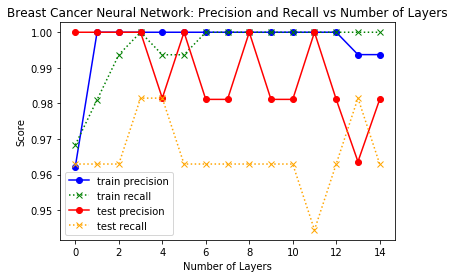

In [57]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Breast Cancer Neural Network: Precision and Recall vs Number of Layers')
#plt.ylim((0,1))
plt.plot(num_layers, list(train_precision), 'o-', color='blue', label='train precision')
plt.plot(num_layers, list(train_recall), 'x', color='green', label='train recall', linestyle=':')

plt.plot(num_layers, list(test_precision), 'o-', color='red', label='test precision')


plt.plot(num_layers, list(test_recall), 'x',color='orange', label='test recall', linestyle=':')
plt.xlabel("Number of Layers")
plt.ylabel("Score")

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('plots/precision_recall_neural_net_num_layers_breastCancer')
plt.legend()
plt.show()
#ideal number of layers is 2 layer

In [11]:
test_precision

[0.3706293706293706,
 0.9375,
 0.9555555555555556,
 0.8653846153846154,
 0.9347826086956522,
 0.9215686274509803,
 0.9545454545454546,
 0.9387755102040817,
 0.9230769230769231,
 0.9183673469387755,
 0.9555555555555556,
 0.9347826086956522,
 0.9555555555555556,
 0.9565217391304348,
 0.9347826086956522]

In [18]:
test_recall

[0.7358490566037735,
 0.9056603773584906,
 0.8490566037735849,
 0.9056603773584906,
 0.8301886792452831,
 0.7924528301886793,
 0.8679245283018868,
 0.8490566037735849,
 0.8113207547169812,
 0.8113207547169812,
 0.9056603773584906,
 0.9056603773584906,
 0.8113207547169812,
 0.8679245283018868,
 0.7924528301886793]

In [65]:
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
#change the max iterations
num_epochs = range(1,701, 20)
train_precision = []
test_precision = []

train_recall = []
test_recall = []

for i in num_epochs:
    hidden_layer = tuple([15]*3)
    mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=i, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1, warm_start=False)
    scaler.fit(X_train)
    X_train_temp = scaler.transform(X_train[:end])
    X_test_temp = scaler.transform(X_test)
    mlp.fit(X_train_temp,y_train[:end])
    
    prediction_test = mlp.predict(X_test_temp)
    prediction_train = mlp.predict(X_train_temp)
    print(confusion_matrix(y_test, prediction_test))

    train_precision.append(precision_score(y_train, prediction_train))
    test_precision.append(precision_score(y_test, prediction_test))
    
    train_recall.append(recall_score(y_train, prediction_train))
    test_recall.append(recall_score(y_test, prediction_test))

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (21) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/neural_n

[[89  0]
 [54  0]]
[[89  0]
 [54  0]]
[[87  2]
 [ 5 49]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (61) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (81) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 3 51]]
[[89  0]
 [ 2 52]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 1 53]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (121) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[87  2]
 [ 3 51]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[87  2]
 [ 2 52]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (161) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 1 53]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (181) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 2 52]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 1 53]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (221) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 3 51]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (241) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[87  2]
 [ 2 52]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (261) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 2 52]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (281) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 2 52]]
[[89  0]
 [ 1 53]]
[[89  0]
 [ 1 53]]
[[89  0]
 [ 3 51]]
[[89  0]
 [ 1 53]]
[[89  0]
 [ 3 51]]
[[89  0]
 [ 2 52]]
[[88  1]
 [ 1 53]]
[[89  0]
 [ 2 52]]
[[89  0]
 [ 2 52]]
[[89  0]
 [ 1 53]]
[[88  1]
 [ 1 53]]
[[89  0]
 [ 2 52]]
[[88  1]
 [ 1 53]]
[[88  1]
 [ 1 53]]
[[88  1]
 [ 2 52]]
[[89  0]
 [ 1 53]]
[[89  0]
 [ 1 53]]
[[89  0]
 [ 1 53]]
[[87  2]
 [ 2 52]]
[[89  0]
 [ 3 51]]


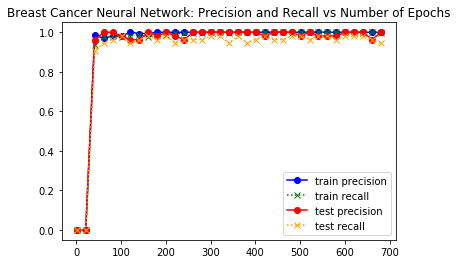

In [66]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Breast Cancer Neural Network: Precision and Recall vs Number of Epochs')
#plt.ylim((0.8,1))
plt.plot(num_epochs, list(train_precision), 'o-', color='blue', label='train precision')
plt.plot(num_epochs, list(train_recall), 'x', color='green', label='train recall', linestyle=':')

plt.plot(num_epochs, list(test_precision), 'o-', color='red', label='test precision')


plt.plot(num_epochs, list(test_recall), 'x',color='orange', label='test recall', linestyle=':')

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('plots/precision_accuracy_neural_net_num_epochs_breastCancer')
plt.legend()
plt.show()
#ideal number of layers is 15*8 layer

In [67]:
train_precision

[0.0,
 0.0,
 0.9866666666666667,
 0.9685534591194969,
 0.9810126582278481,
 0.9808917197452229,
 1.0,
 0.9936305732484076,
 0.9935483870967742,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [68]:
test_recall

[0.0,
 0.0,
 0.9074074074074074,
 0.9444444444444444,
 0.9629629629629629,
 0.9814814814814815,
 0.9444444444444444,
 0.9629629629629629,
 0.9814814814814815,
 0.9629629629629629,
 0.9814814814814815,
 0.9444444444444444,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9814814814814815,
 0.9814814814814815,
 0.9444444444444444,
 0.9814814814814815,
 0.9444444444444444,
 0.9629629629629629,
 0.9814814814814815,
 0.9629629629629629,
 0.9629629629629629,
 0.9814814814814815,
 0.9814814814814815,
 0.9629629629629629,
 0.9814814814814815,
 0.9814814814814815,
 0.9629629629629629,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9629629629629629,
 0.9444444444444444]

In [69]:
train_recall

[0.0,
 0.0,
 0.9367088607594937,
 0.9746835443037974,
 0.9810126582278481,
 0.9746835443037974,
 0.9810126582278481,
 0.9873417721518988,
 0.9746835443037974,
 0.9873417721518988,
 0.9873417721518988,
 0.9936708860759493,
 0.9936708860759493,
 0.9936708860759493,
 0.9936708860759493,
 1.0,
 1.0,
 0.9936708860759493,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9936708860759493,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9936708860759493,
 0.9936708860759493,
 1.0,
 0.9936708860759493]

In [25]:
test_precision

[0.3706293706293706,
 0.5822784810126582,
 0.9166666666666666,
 0.9555555555555556,
 0.9545454545454546,
 0.9038461538461539,
 0.9574468085106383,
 0.3706293706293706,
 0.9545454545454546,
 0.9361702127659575,
 0.9534883720930233,
 0.9565217391304348,
 0.847457627118644,
 0.94,
 0.94,
 0.9347826086956522,
 0.9555555555555556,
 0.9565217391304348,
 0.9347826086956522,
 0.9375,
 0.9534883720930233,
 0.92,
 0.9375,
 0.9361702127659575,
 0.9545454545454546,
 0.92,
 0.9056603773584906,
 0.9347826086956522,
 0.9375,
 0.92,
 0.9555555555555556,
 0.9375,
 0.92,
 0.8571428571428571,
 0.9591836734693877]

In [62]:
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


#change the max iterations
active = ['identity', 'logistic', 'tanh', 'relu']
train_precision = []
test_precision = []

train_recall = []
test_recall = []
portions = range(10, 101, 10)


for i in active:
    ker_train_prec = []
    ker_test_prec = []

    ker_train_recall = []
    ker_test_recall = []

    
    for count, o in enumerate(portions):
        end = int(len(X_train)* o/100.0)

        print ('portions=' + str(o) + str(i))
        
        hidden_layer = tuple([15]*3)
        mlp = MLPClassifier(activation=i, alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=200, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1, warm_start=False)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_temp = scaler.transform(X_train[:end])
        X_test_temp = scaler.transform(X_test)
        mlp.fit(X_train_temp,y_train[:end])
        prediction_test = mlp.predict(X_test_temp)
        prediction_train = mlp.predict(X_train_temp)
        
        ker_train_prec.append(precision_score(y_train[:end], prediction_train))
        ker_test_prec.append(precision_score(y_test, prediction_test))

        ker_train_recall.append(recall_score(y_train[:end], prediction_train))
        ker_test_recall.append(recall_score(y_test, prediction_test))
        
        print(confusion_matrix(y_test, prediction_test))
    train_recall.append(ker_train_recall)
    test_recall.append(ker_test_recall)
    train_precision.append(ker_train_prec)
    test_precision.append(ker_test_prec)
                               
                               

portions=10identity
[[89  0]
 [ 2 52]]
portions=20identity


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[86  3]
 [ 2 52]]
portions=30identity
[[85  4]
 [ 2 52]]
portions=40identity


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[86  3]
 [ 2 52]]
portions=50identity


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[86  3]
 [ 1 53]]
portions=60identity


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 2 52]]
portions=70identity


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[87  2]
 [ 2 52]]
portions=80identity


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 2 52]]
portions=90identity


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 2 52]]
portions=100identity
[[88  1]
 [ 1 53]]
portions=10logistic


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[87  2]
 [ 9 45]]
portions=20logistic


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 5 49]]
portions=30logistic


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 3 51]]
portions=40logistic


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 3 51]]
portions=50logistic


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 1 53]]
portions=60logistic


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 4 50]]
portions=70logistic


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 2 52]]
portions=80logistic


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 2 52]]
portions=90logistic


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 3 51]]
portions=100logistic


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 2 52]]
portions=10tanh


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[85  4]
 [ 1 53]]
portions=20tanh


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[87  2]
 [ 2 52]]
portions=30tanh


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[87  2]
 [ 3 51]]
portions=40tanh


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[87  2]
 [ 2 52]]
portions=50tanh


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[86  3]
 [ 3 51]]
portions=60tanh


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[87  2]
 [ 2 52]]
portions=70tanh


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 2 52]]
portions=80tanh


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 2 52]]
portions=90tanh


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 1 53]]
portions=100tanh


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 2 52]]
portions=10relu
[[84  5]
 [ 7 47]]
portions=20relu


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[87  2]
 [ 3 51]]
portions=30relu
[[87  2]
 [ 3 51]]
portions=40relu


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[85  4]
 [ 2 52]]
portions=50relu


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[86  3]
 [ 3 51]]
portions=60relu


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 2 52]]
portions=70relu


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[88  1]
 [ 2 52]]
portions=80relu


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[87  2]
 [ 2 52]]
portions=90relu


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[89  0]
 [ 3 51]]
portions=100relu
[[89  0]
 [ 1 53]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


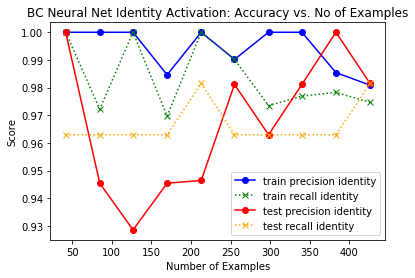

In [63]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('BC Neural Net Identity Activation: Accuracy vs. No of Examples')
#plt.ylim((0.9,1))
ps=[int(len(X_train)* p/100.0) for p in portions]


plt.plot(ps, list(train_precision[0]), 'o-', color='blue', label='train precision identity')
plt.plot(ps, list(train_recall[0]), 'x', color='green', label='train recall identity', linestyle=':')

plt.plot(ps, list(test_precision[0]), 'o-', color='red', label='test precision identity')
plt.plot(ps, list(test_recall[0]), 'x',color='orange', label='test recall identity', linestyle=':')


plt.xlabel("Number of Examples")
plt.ylabel("Score")

plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend()
plt.show()

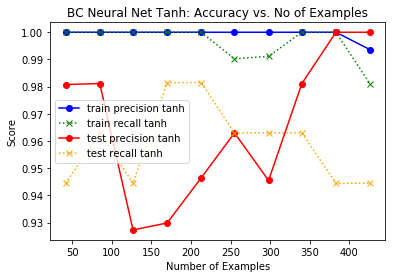

In [46]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('BC Neural Net Tanh: Accuracy vs. No of Examples')
#plt.ylim((0.9,1))
ps=[int(len(X_train)* p/100.0) for p in portions]

plt.plot(ps, list(train_precision[2]), 'o-', color='blue', label='train precision tanh')
plt.plot(ps, list(train_recall[2]), 'x', color='green', label='train recall tanh', linestyle=':')

plt.plot(ps, list(test_precision[2]), 'o-', color='red', label='test precision tanh')
plt.plot(ps, list(test_recall[2]), 'x',color='orange', label='test recall tanh', linestyle=':')



plt.xlabel("Number of Examples")
plt.ylabel("Score")

plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend()
plt.show()

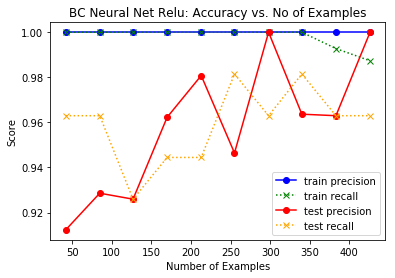

In [47]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('BC Neural Net Relu: Accuracy vs. No of Examples')
#plt.ylim((0.9,1))
ps=[int(len(X_train)* p/100.0) for p in portions]

plt.plot(ps, list(train_precision[3]), 'o-', color='blue', label='train precision')
plt.plot(ps, list(train_recall[3]), 'x', color='green', label='train recall', linestyle=':')

plt.plot(ps, list(test_precision[3]), 'o-', color='red', label='test precision')
plt.plot(ps, list(test_recall[3]), 'x',color='orange', label='test recall', linestyle=':')

plt.xlabel("Number of Examples")
plt.ylabel("Score")

plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend()
plt.show()

In [48]:
test_recall[3]

[0.9629629629629629,
 0.9629629629629629,
 0.9259259259259259,
 0.9444444444444444,
 0.9444444444444444,
 0.9814814814814815,
 0.9629629629629629,
 0.9814814814814815,
 0.9629629629629629,
 0.9629629629629629]

In [49]:
test_recall[0]

[0.9259259259259259,
 0.9629629629629629,
 0.9444444444444444,
 0.9814814814814815,
 0.9444444444444444,
 0.9814814814814815,
 0.9629629629629629,
 0.9814814814814815,
 0.9444444444444444,
 0.9814814814814815]

In [50]:
test_recall[2]

[0.9444444444444444,
 0.9629629629629629,
 0.9444444444444444,
 0.9814814814814815,
 0.9814814814814815,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9444444444444444,
 0.9444444444444444]

In [51]:
test_recall[1]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]